In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer


In [2]:
data=pd.read_excel("C:\\Users\\HP\\Desktop\\Projects\\Higher Education Students Early Perceptions of ChatGPT Global Survey Data\\final dataset.xlsx")

In [4]:
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
data.head()

Shape: (23218, 174)
Columns: ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18a', 'Q18b', 'Q18c', 'Q18d', 'Q18e', 'Q18f', 'Q18g', 'Q18h', 'Q18i', 'Q18j', 'Q18k', 'Q18l', 'Q19a', 'Q19b', 'Q19c', 'Q19d', 'Q19e', 'Q19f', 'Q19g', 'Q19h', 'Q19i', 'Q19j', 'Q20', 'Q21a', 'Q21b', 'Q21c', 'Q21d', 'Q22a', 'Q22b', 'Q22c', 'Q22d', 'Q22e', 'Q22f', 'Q22g', 'Q22h', 'Q22i', 'Q22j', 'Q23a', 'Q23b', 'Q23c', 'Q23d', 'Q24a', 'Q24b', 'Q24c', 'Q24d', 'Q24e', 'Q24f', 'Q24g', 'Q25a', 'Q25b', 'Q25c', 'Q25d', 'Q26a', 'Q26b', 'Q26c', 'Q26d', 'Q26e', 'Q26f', 'Q26g', 'Q26h', 'Q26i', 'Q26j', 'Q27a', 'Q27b', 'Q27c', 'Q27d', 'Q27e', 'Q27f', 'Q27g', 'Q27h', 'Q27i', 'Q27j', 'Q28a', 'Q28b', 'Q28c', 'Q28d', 'Q28e', 'Q28f', 'Q28g', 'Q28h', 'Q28i', 'Q29a', 'Q29b', 'Q29c', 'Q29d', 'Q29e', 'Q29f', 'Q29g', 'Q29h', 'Q29i', 'Q30a', 'Q30b', 'Q30c', 'Q30d', 'Q30e', 'Q30f', 'Q30g', 'Q30h', 'Q30i', 'Q30j', 'Q30k', 'Q30l', 'Q31a', 'Q31b', 'Q31c', 'Q31d', 'Q32a', 'Q32b

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q40g,Q40h,Q40i,Q40j,Q40k,Q40l,Q40m,Q40n,Q40o,source
0,Afghanistan,2.0,27.0,Afghanistan,القدس المفتوحة,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR
1,Afghanistan,4.0,100.0,Afghanistan,456,2.0,2.0,3.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
2,Afghanistan,1.0,21.0,Albania,منيا,1.0,1.0,1.0,1.0,1.0,...,3.0,2.0,3.0,4.0,3.0,2.0,2.0,1.0,1.0,EN
3,Afghanistan,1.0,18.0,Ecuador,"Universidad Indoamerica., Facultad Arquitectur...",2.0,1.0,1.0,1.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,ES
4,Afghanistan,2.0,26.0,Spain,De vigo universidad,1.0,2.0,2.0,1.0,2.0,...,4.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,ES


In [7]:
# Step 1: Map Likert scale (only if not already numeric)
likert_5_map = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

satisfaction_cols = ['Q24e', 'Q24f', 'Q24g']
for col in satisfaction_cols:
    if col in data.columns and data[col].dtype == 'object':
        data[col] = data[col].map(likert_5_map)

# Step 2: Drop columns with all NaNs before imputing
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
valid_numeric_cols = [col for col in numeric_cols if not data[col].isnull().all()]

# Step 3: Impute and scale
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy='mean')
data[valid_numeric_cols] = imputer.fit_transform(data[valid_numeric_cols])

# Step 4: Create regression target
data['satisfaction_score'] = data[satisfaction_cols].mean(axis=1)


C:\Users\HP\AppData\Local\Temp\ipykernel_12704\1463297960.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['satisfaction_score'] = data[satisfaction_cols].mean(axis=1)


In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le


In [11]:
print("Unique values before mapping:")
for col in ['Q24e', 'Q24f', 'Q24g']:
    print(f"{col}: {data[col].unique()}")


Unique values before mapping:
Q24e: [3.52864546 3.         4.         5.         1.         2.        ]
Q24f: [3.33112678 3.         4.         5.         2.         1.        ]
Q24g: [3.16001151 2.         4.         3.         5.         1.        ]


In [13]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])



In [15]:
# Columns involved in satisfaction score
satisfaction_cols = ['Q24e', 'Q24f', 'Q24g']

# Check if these columns exist
for col in satisfaction_cols:
    if col not in data.columns:
        raise ValueError(f"Missing column: {col}")

# Create composite satisfaction score
data['satisfaction_score'] = data[satisfaction_cols].mean(axis=1)

print(data['satisfaction_score'].describe())
data[['satisfaction_score']].head()


count    23218.000000
mean         0.584982
std          0.160360
min          0.000000
25%          0.500000
50%          0.584982
75%          0.666667
max          1.000000
Name: satisfaction_score, dtype: float64


,satisfaction_score
0,0.584982
1,0.584982
2,0.416667
3,0.584982
4,0.750000


In [17]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['satisfaction_score'])
y = data['satisfaction_score']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (18574, 174)
Test shape: (4644, 174)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
X = data.drop(columns=['satisfaction_score'])
y = data['satisfaction_score']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


LINEAR REGRESSION

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

print("📘 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R² Score:", r2_score(y_test, lr_preds))

📘 Linear Regression Performance:
MAE: 3.557491054082433e-16
MSE: 2.1796094374147568e-31
RMSE: 4.668628746660797e-16
R² Score: 1.0


In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("\n🌲 Random Forest Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R² Score:", r2_score(y_test, rf_preds))



🌲 Random Forest Regressor Performance:
MAE: 0.0003192903699822134
MSE: 9.143506351057094e-06
RMSE: 0.003023823134883569
R² Score: 0.999633786087686


In [51]:
def classify_satisfaction(score):
    if score <= 0.4:
        return 1  # Low
    elif score <= 0.7:
        return 2  # Medium
    else:
        return 3  # High

data['satisfaction_level'] = data['satisfaction_score'].apply(classify_satisfaction)

# Check class counts again
print(data['satisfaction_level'].value_counts())


satisfaction_level
2    16783
3     4469
1     1966
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_12704\1157075241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction_level', data=data, palette='viridis')


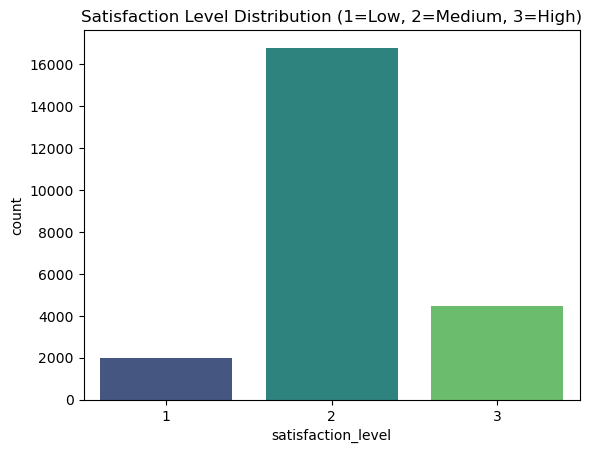

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='satisfaction_level', data=data, palette='viridis')
plt.title("Satisfaction Level Distribution (1=Low, 2=Medium, 3=High)")
plt.show()


In [55]:
from sklearn.model_selection import train_test_split

# Drop both target columns from features
X = data.drop(columns=['satisfaction_score', 'satisfaction_level'])
y = data['satisfaction_level']

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit & predict
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)

# Evaluation
print("📊 Logistic Regression Results")
print(classification_report(y_test, lr_preds))


📊 Logistic Regression Results
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       393
           2       1.00      1.00      1.00      3357
           3       1.00      1.00      1.00       894

    accuracy                           1.00      4644
   macro avg       1.00      0.99      1.00      4644
weighted avg       1.00      1.00      1.00      4644



In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),  # Optional for RF, but we keep it consistent
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

print("🌲 Random Forest Classifier Results")
print(classification_report(y_test, rf_preds))


🌲 Random Forest Classifier Results
              precision    recall  f1-score   support

           1       0.99      0.85      0.91       393
           2       0.97      1.00      0.98      3357
           3       1.00      0.94      0.97       894

    accuracy                           0.97      4644
   macro avg       0.98      0.93      0.95      4644
weighted avg       0.97      0.97      0.97      4644

